In [55]:
library(ggplot2)
library(cowplot)
theme_set(theme_bw())

In [56]:
options(repr.plot.width = 6, repr.plot.height = 4)

# Benchmarking

In [5]:
file <- '../data/out/batchqc/benchmarking/profiling1.csv'
performance <- read.csv(file, header = T, stringsAsFactors = T)
metrics <- c('RVP', 'gPCA', 'PVCA')
performance$metric <- factor(performance$metric, levels = metrics)
performance$memory <- performance$memory / 1e6

## Runtime

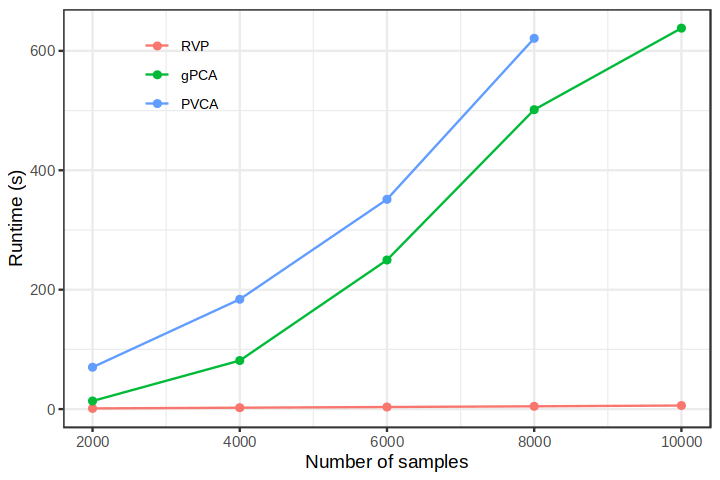

In [60]:
xlab <- 'Number of samples'
ylab <- 'Runtime (s)'

ax <- ggplot(performance) +
  geom_point(aes(x = samples, y = runtime, col = metric)) +
  geom_line(aes(x = samples, y = runtime, col = metric)) +
  labs(x = xlab, y = ylab, col = 'Metric') +
  theme(
    legend.text = element_text(size = 8),
    legend.position = c(.25, .99),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.key = element_rect(fill='transparent'),
    legend.background = element_rect(fill='transparent'),
    legend.title = element_blank()
  )
#   scale_y_continuous(trans = 'log10')
ax

In [59]:
file <- '~/Dropbox/tmp/runtimes.pdf'
ggsave(file, ax, width = 4, height = 3)

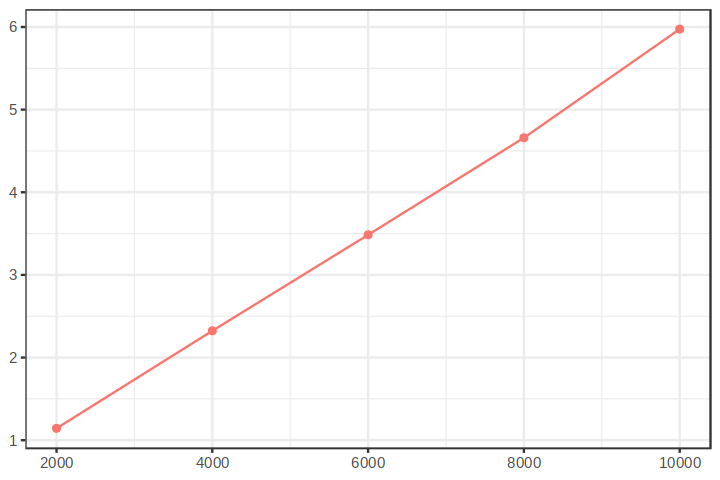

In [74]:
perf_rvp <- subset(performance, metric == "RVP")

xlab <- 'Number of samples'
ylab <- 'Runtime (s)'

ax <- ggplot(perf_rvp, aes(x = samples, y = runtime, col = metric)) +
  geom_point(show.legend = FALSE) +
  geom_line(show.legend = FALSE) +
  labs(x = xlab, y = ylab, col = 'Metric') +
  theme(
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    legend.text = element_text(size = 8),
    legend.position = c(.25, .99),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.key = element_rect(fill='transparent'),
    legend.background = element_rect(fill='transparent'),
    legend.title = element_blank()
  )
#   scale_y_continuous(trans = 'log10')
ax

In [75]:
file <- '~/Dropbox/tmp/runtimes-rvp.pdf'
ggsave(file, ax, width = 3, height = 2)

## Peak memory

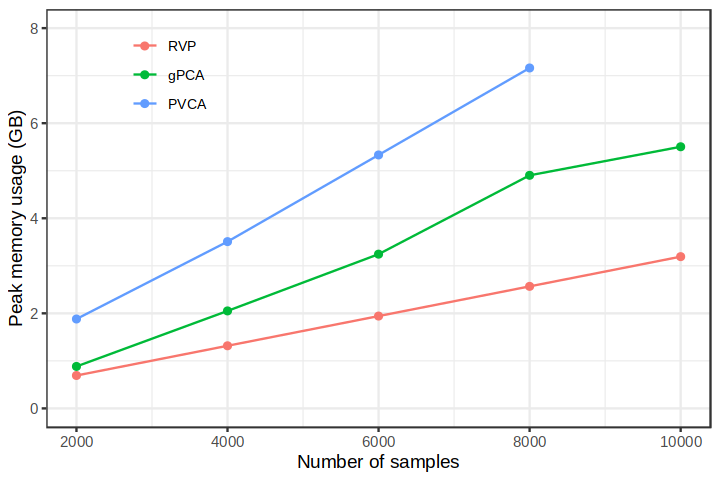

In [61]:
xlab <- 'Number of samples'
ylab <- 'Peak memory usage (GB)'

ax <- ggplot(performance) +
  geom_point(aes(x = samples, y = memory, col = metric)) +
  geom_line(aes(x = samples, y = memory, col = metric)) +
  labs(x = xlab, y = ylab, col = 'Metric') +
  ylim(0, 8) +
  theme(
    legend.text = element_text(size = 8),
    legend.position = c(.25, .99),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.key = element_rect(fill='transparent'),
    legend.background = element_rect(fill='transparent'),
    legend.title = element_blank()
  )
#   scale_y_continuous(trans = 'log10')
ax

In [43]:
file <- '~/Dropbox/tmp/memory.pdf'
ggsave(file, ax, width = 4, height = 3)